In [63]:
#Predicting Federal Reserve Interest Rate Decisions
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Loading the data
data = pd.read_csv('../cleaned/PCE_FedFunds.csv')

#Checking the data
data.head()

,Date,PCE,Federal Reserve Rate,FedRate Movement
0,1959-01-01,306091,2.48,0.00
1,1959-02-01,309554,2.43,-0.05
2,1959-03-01,312702,2.80,0.37
3,1959-04-01,312193,2.96,0.16
4,1959-05-01,316130,2.90,-0.06


In [65]:
#Base the movement classification on the standard deviation of the data start with .5
#adjust for better accuracy
sd = data['FedRate Movement'].std()

#Define threshold for movement classificaiton
upper_threshold = .5 * sd
lower_threshold = -.5 * sd

#assign labels
def classify_rate_change(change):
    if change > upper_threshold:
        return 1
    elif change < lower_threshold:
        return -1
    else:
        return 0
    
#Create a new column for the classification
data['Rate Movement'] = data['FedRate Movement'].apply(classify_rate_change)

#Checking the data
data.head(10)

,Date,PCE,Federal Reserve Rate,FedRate Movement,Rate Movement
0,1959-01-01,306091,2.48,0.00,0
1,1959-02-01,309554,2.43,-0.05,0
2,1959-03-01,312702,2.80,0.37,1
3,1959-04-01,312193,2.96,0.16,0
4,1959-05-01,316130,2.90,-0.06,0
5,1959-06-01,318193,3.39,0.49,1
6,1959-07-01,317787,3.47,0.08,0
7,1959-08-01,320161,3.50,0.03,0
8,1959-09-01,324228,3.76,0.26,1
9,1959-10-01,322794,3.98,0.22,0


In [66]:
#verify integer values for Rate Movement
data['Rate Movement'].dtype

dtype('int64')

In [67]:
#Check the value counts of the new column
data['Rate Movement'].value_counts()

Rate Movement
 0    564
-1    120
 1    106
Name: count, dtype: int64

In [68]:
#check columns
data.columns


Index(['Date', 'PCE', 'Federal Reserve Rate', 'FedRate Movement',
       'Rate Movement'],
      dtype='object')

In [69]:
#convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [70]:
data.dtypes

Date                    datetime64[ns]
PCE                              int64
Federal Reserve Rate           float64
FedRate Movement               float64
Rate Movement                    int64
dtype: object

In [71]:
#Copy data to new dataframe
data2 = data.copy()

#confirm the data was saved
print('Data Saved')


Data Saved


In [72]:
#Define features and target
X = data2[['PCE']]
y = data2['Rate Movement']

In [75]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#print the shape of the training and testing sets

print(X_train.shape)
print(X_test.shape)

(553, 1)
(237, 1)


In [76]:
#Initialize the model
model = RandomForestClassifier(n_estimators=64, random_state=42, class_weight='balanced')

#Fit the model
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=64,
                       random_state=42)

In [77]:
#make predictions
y_pred = model.predict(X_test)

#Check the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.41      0.37      0.39        38
           0       0.78      0.82      0.80       168
           1       0.32      0.29      0.31        31

    accuracy                           0.68       237
   macro avg       0.51      0.49      0.50       237
weighted avg       0.66      0.68      0.67       237



# Model Evaluation

In [78]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Display results
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.6751054852320675


In [79]:
# Evaluate the model
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6751054852320675


# Max Depth Overfitting Optimization 
#### Max Depth was used to try and address the overfitting of the model. 

In [80]:
# Create a loop to vary the max_depth parameter
# Make sure to record the train and test scores 
# for each pass.

# Depths should span from 1 up to 20 in steps of 2
depths = range(1, 20, 2)

# The scores dataframe will hold depths and scores
# to make plotting easy
scores = {'train': [], 'test': [], 'depth': []}

# Loop through each depth (this will take time to run)
for depth in depths:
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    scores['depth'].append(depth)
    scores['train'].append(train_score)
    scores['test'].append(test_score)

# Create a dataframe from the scores dictionary and
# set the index to depth
scores_df = pd.DataFrame(scores).set_index('depth')

scores_df.head(10)

,train,test
depth,,
1,0.716094,0.708861
3,0.723327,0.713080
5,0.819168,0.734177
7,0.893309,0.708861
9,0.951175,0.683544
11,0.983725,0.675105
13,0.996383,0.679325
15,1.000000,0.675105
17,1.000000,0.675105


<Axes: xlabel='depth'>

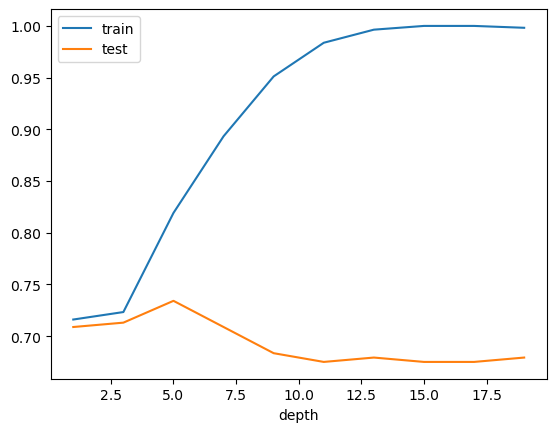

In [81]:
# Plot the scores dataframe with the plot method
scores_df.plot()

In [82]:
# it looks like the lines start to diverge a lot after 3
# Create and train a RandomForest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 3, n_estimators=64)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7251356238698011
0.7130801687763713


# Grid Search CV Optimization
#### The Grid Search CV Optimization improved the accuracy score slightly from 67% to 72%. This Optimization model is not the prefered model due to the fact that we have imbalanced data, and a smaller number of data points.

In [83]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create three Random Forest classifiers
#from sklearn.neighbors import RandomForestClassifer
untuned_model = RandomForestClassifier()
grid_tuned_model = RandomForestClassifier()
random_tuned_model = RandomForestClassifier()

In [84]:
# Train a model without tuning
#from sklearn.metrics import classification_report
untuned_model.fit(X_train, y_train)
untuned_y_pred = untuned_model.predict(X_test)
print(classification_report(y_test, untuned_y_pred,target_names=['Down','No Change','Up']))
#print(classification_report(y_test, untuned_y_pred))               

              precision    recall  f1-score   support

        Down       0.41      0.37      0.39        38
   No Change       0.78      0.82      0.80       168
          Up       0.32      0.29      0.31        31

    accuracy                           0.68       237
   macro avg       0.51      0.49      0.50       237
weighted avg       0.66      0.68      0.67       237



In [ ]:
# Create the grid search estimator along with a parameter object containing the values to adjust.
# Adjusted min_samples_split with values of 1 through 10. Adjust min_samples_leaf with values 1 through 10.
# Include min_weight_fraction_leaf.
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_weight_fraction_leaf':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
             }
grid = GridSearchCV(untuned_model, param_grid, verbose=3)

In [ ]:
# Fit the model by using the grid search estimator.
# This will take the Random Forest model and try each combination of parameters.
grid.fit(X_train, y_train)

In [87]:
# List the best parameters for this dataset
print(grid.best_params_)

{'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0}


In [88]:
# Print the classification report for the best model
grid_y_pred = grid.predict(X_test)
print(classification_report(y_test, grid_y_pred,target_names=['Down','No Change','Up'])) 

              precision    recall  f1-score   support

        Down       0.52      0.42      0.46        38
   No Change       0.80      0.89      0.84       168
          Up       0.45      0.29      0.35        31

    accuracy                           0.73       237
   macro avg       0.59      0.53      0.55       237
weighted avg       0.71      0.73      0.72       237

